# Neural Networks (Artificial Neural Networks)
1. Neural networks are complex models used for classification and regression tasks - supervised learning
    1. Complex and deep neural networks (deep learning) can used for unsupervised learning
2. Neural Networks imitate biological activities in the brain, where neurons are interconnected and learn from experience
3. The main strength of neural networks is their high predictive performance
    1. It captures very complex relationships between predictors and outcome variable

## Concepts of Neural Networks
1. Neural networks are composed of input layers, hidden layers and output layers
2. Input layers (sometimes called neurons) accepts predictor value
3. Layers between the input and output layers are known as hidden layers - MultiLayer Perceptron Model
4. The last layer is called the output layer
    1. It gives the prediction label (for classification) or prediction number (for regression)
    
## Neural Network Architecture - Feed Forward Neural Network
1. Feedforward network is a fully connected network with a one-way flow and no cycle
![alt text](nnets.png "Title")

## The Anatomy of Neural Networks
![alt text](nnets1.png "Title")

## Import Required Packages

In [1]:
# %reset

%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

## Bring in the Data

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing
1. The "ID" and "ZIP Code" columns are not relevant for model building and therefore should be removed.
2. If a column name has a space, replace the space with an underscore (_)
3. Change the "Education" variable to be type "category". Rename the values (1,2,3) of Education variable to the following:
    1. 1 = "Undergrad"
    2. 2 = "Graduate"
    3. 3 = "Advanced/Professional"
4. Turn the renamed variable to be a dummy variable

In [3]:
# Delete the ID and ZIP code columns
bank_dfv2 = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace space with underscore in column names
bank_dfv2.columns = bank_dfv2.columns.str.replace(' ', '_')

# Change "Education" column as categorical
bank_dfv2['Education'] = bank_dfv2['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Advanced/ Professional"
new_categories = {1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'}
bank_dfv2.Education.cat.rename_categories(new_categories, inplace=True)

# Create dummy variables for the categorical data
bank_dfv3 = pd.get_dummies(bank_dfv2, prefix_sep='_', drop_first=True)

## Data Preprocessing
1. Identify dependent and independent variables
2. Standardize the data to negate effect of variable scale (income vs height)
4. Split data into training and testing data
    1. 60% training and 40% testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify dependent and independent variables
y = bank_dfv3['Personal_Loan']
X = bank_dfv3.drop(columns=['Personal_Loan'])

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X = StandardScaler().fit_transform(X)
std_X_df = pd.DataFrame(std_X, columns=X.columns)

# Partition data into training (60%) and testing (40%)
train_X, test_X, train_y, test_y = train_test_split(std_X_df, y, test_size=0.4, random_state=1)

## Modeling "Personal Loans" Using Neural Networks
1. Check for the effects of overfitting:
    1. Check difference between training and testing metric - accuracy
    2. Use cross validation

In [5]:
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# Scaling the data for MLP classifier. Values will be between 0 and 1
scaler = MinMaxScaler()
scaled_data_train = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
scaled_data_test = pd.DataFrame(scaler.fit_transform(test_X), columns=test_X.columns)

# fit MLP (MultiLayer Perceptron) model
mlp = MLPClassifier(hidden_layer_sizes=3, activation='logistic', solver='lbfgs', random_state=1, max_iter=300)
mlp.fit(scaled_data_train, train_y)

print("***Confusion matrix and accuracy for training data")
classificationSummary(train_y, mlp.predict(scaled_data_train))

print("\n\n***Confusion matrix and accuracy for testing data")
classificationSummary(test_y, mlp.predict(scaled_data_test))

# Check cross-validation
acc_scores = cross_val_score(mlp, train_X, train_y, cv=5, scoring="accuracy")
print("\n\n***MLP accuracy using 5-fold cv:", round(acc_scores.mean(), 4))

***Confusion matrix and accuracy for training data
Confusion Matrix (Accuracy 0.9907)

       Prediction
Actual    0    1
     0 2705    8
     1   20  267


***Confusion matrix and accuracy for testing data
Confusion Matrix (Accuracy 0.9635)

       Prediction
Actual    0    1
     0 1758   49
     1   24  169


***MLP accuracy using 5-fold cv: 0.9763


## Modeling "Personal Loans" Using Neural Networks
1. Check for the effects of overfitting:
    1. Check maximum number of iterations - max iter

In [ ]:
train_mis_rate = []
test_mis_rate = []

num = 301
for i in range(1, num):    
    mlp_cv = MLPClassifier(hidden_layer_sizes=1, activation='logistic', solver='lbfgs', random_state=1, max_iter=i)

    #Accuracy rate for testing and training data using 5-fold cross validation
    train_acc = cross_val_score(mlp_cv, scaled_data_train, train_y, cv=5, scoring="accuracy").mean()
    test_acc = cross_val_score(mlp_cv, scaled_data_test, test_y, cv=5, scoring="accuracy").mean()

    train_mis_rate.append(1 - train_acc) #Misclassification rate for training data
    test_mis_rate.append(1 - test_acc)   #Misclassification rate for testing data

# Plot misclassification rate for training and testing data
plt.plot(np.arange(1, num), train_mis_rate, label="Training Data")
plt.plot(np.arange(1, num), test_mis_rate, label="Testing Data")
plt.title("Overfitting")
plt.xlabel("Iterations")
plt.ylabel("Misclassification Rates")
plt.legend(loc="upper right")
plt.show()

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

## Modeling "Personal Loans" Using Decision Tree Model
1. Deal with overfitting by using a grid-search to
    1. Restrict the depth of the tree
    2. Specify a minimum number of records in a node required for splitting
    3. Find the minimum impurity decrease
2. Deal with overfitting by using cross-validation
3. Plot The Decision Tree Model

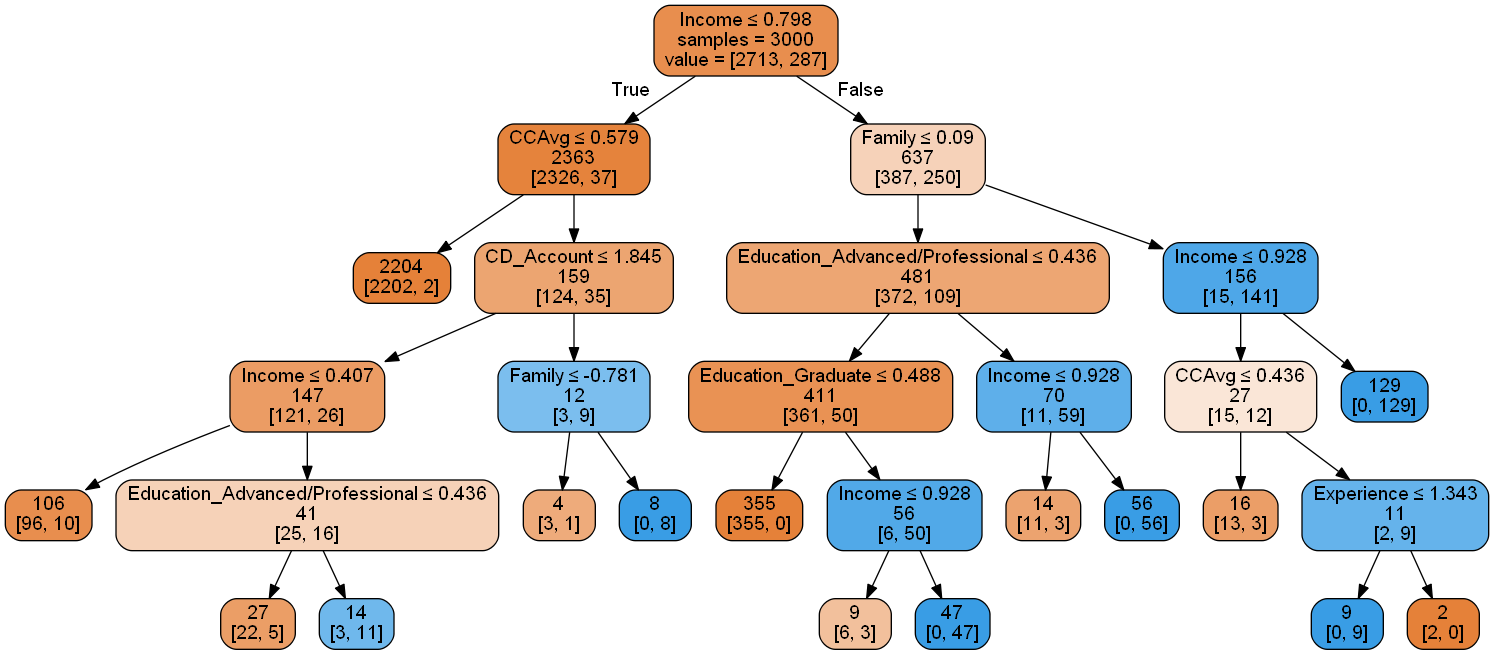

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree

# Parameters for grid search
parameters = {
    'max_depth': list(range(2, 11)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(train_X, train_y)

# Best decision tree from the grid search
best_tree = grid_search.best_estimator_

# PLot the best tree
plotDecisionTree(best_tree, feature_names=train_X.columns)

## Modeling "Personal Loans" Using Other Models
1. Fit the kNN model on the training data
    1. The choice of "k" is crucial
    2. KNN is a non-parametric model
2. Fit the discriminant analysis model on the training data
3. Fit the logistic regression model on the training data

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# fit kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

# fit discriminant analysis model
da = LinearDiscriminantAnalysis()
da.fit(train_X, train_y)

# fit a logistic regression
log = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
log.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

## Modeling "Personal Loans"
1. For each model get
    1. Class prediction label of the training
    2. Probabilities of belonging to the class of the training and testing data

In [32]:
# MLP class label for training and testing data
mlp_pred_train = mlp.predict(scaled_data_train)
mlp_pred_test = mlp.predict(scaled_data_test)

# Decision Tree (Best) class label for training and testing data
dt_pred_train = best_tree.predict(train_X)
dt_pred_test = best_tree.predict(test_X)

# kNN class label for training and testing data
knn_pred_train = knn.predict(train_X)
knn_pred_test = knn.predict(test_X)

# discriminant analysis class label for training and testing data
da_pred_train = da.predict(train_X)
da_pred_test = da.predict(test_X)

# Logistic regression class label for training and testing data
log_pred_train = log.predict(train_X)
log_pred_test = log.predict(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Class":train_y, "MLP_Prediction":mlp_pred_train,\
                             "DT_Prediction":dt_pred_train,\
                             "kNN_Prediction":knn_pred_train,\
                             "DA_Prediction":da_pred_train,\
                             "Logistic_Prediction":log_pred_train})

print("Class predictions for training data")
pred_summary.head(10)

Class predictions for training data


,Actual_Class,MLP_Prediction,DT_Prediction,kNN_Prediction,DA_Prediction,Logistic_Prediction
4522,0,0,0,0,0,0
2851,0,0,0,0,0,0
2313,0,0,0,0,0,0
982,0,0,0,0,0,0
1164,1,1,1,1,1,1
1779,0,0,0,0,0,0
2146,0,0,0,0,0,0
4544,0,0,0,0,0,0
2363,0,0,0,0,0,0
1918,1,1,1,1,1,1


## Modeling "Personal Loans"
1. For each model get
    1. Probabilities of belonging to the class of the training

In [33]:
# MLP class label for training and testing data
mlp_prob_train = mlp.predict_proba(scaled_data_train)
mlp_prob_test = mlp.predict_proba(scaled_data_test)

# Decision Tree class label for training and testing data
dt_prob_train = best_tree.predict_proba(train_X)
dt_prob_test = best_tree.predict_proba(test_X)

# kNN class label for training and testing data
knn_prob_train = knn.predict_proba(train_X)
knn_prob_test = knn.predict_proba(test_X)

# discriminant analysis class label for training and testing data
da_prob_train = da.predict_proba(train_X)
da_prob_test = da.predict_proba(test_X)

# discriminant analysis class label for training and testing data
log_prob_train = log.predict_proba(train_X)
log_prob_test = log.predict_proba(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"MLP_Probability_P(Y=0)": mlp_prob_train[:,0],\
                             "DT_Probability_P(Y=0)": dt_prob_train[:,0],\
                             "kNN_Probability_P(Y=0)": knn_prob_train[:,0],\
                             "DA_Probability_P(Y=0)":da_prob_train[:,0],\
                             "Logistic_Probability_P(Y=0)":log_prob_train[:,0]})

print("Class predictions for training data")
pred_summary.head()

Class predictions for training data


,MLP_Probability_P(Y=0),DT_Probability_P(Y=0),kNN_Probability_P(Y=0),DA_Probability_P(Y=0),Logistic_Probability_P(Y=0)
0,1.000000,0.999093,1.0,0.999982,0.999985
1,0.996753,0.999093,1.0,0.979038,0.943801
2,1.000000,0.999093,1.0,0.998897,0.996905
3,1.000000,0.999093,1.0,0.997964,0.994108
4,0.028678,0.000000,0.0,0.037132,0.198476


## Model Evaluation
1. Provide the model's accuracy rate and comment on it
2. Provide the model's misclassification rate and comment on it

In [34]:
from sklearn.metrics import accuracy_score

# Accuracy rate for knn, LDA and logistic
mlp_test_accuracy = accuracy_score(test_y, mlp_pred_test)
dt_test_accuracy = accuracy_score(test_y, dt_pred_test)
knn_test_accuracy = accuracy_score(test_y, knn_pred_test)
da_test_accuracy = accuracy_score(test_y, da_pred_test)
log_test_accuracy = accuracy_score(test_y, log_pred_test)

# Get misclassification rate
mlp_test_misclass = round(1 - mlp_test_accuracy, 4)
dt_test_misclass = round(1 - dt_test_accuracy, 4)
knn_test_misclass = round(1 - knn_test_accuracy, 4)
da_test_misclass = round(1 - da_test_accuracy, 4)
log_test_misclass = round(1 - log_test_accuracy, 4)

print("Accuracy rate for MLP:", mlp_test_accuracy)
print("Accuracy rate for decision tree:", dt_test_accuracy)
print("Accuracy rate for knn:", knn_test_accuracy)
print("Accuracy rate for linear discriminant analysis:", da_test_accuracy)
print("Accuracy rate for logistic regression:", log_test_accuracy)

print("\nMisclassification rate for MLP:", mlp_test_misclass)
print("Misclassification rate for decision tree:", dt_test_misclass)
print("Misclassification rate for kNN:", knn_test_misclass)
print("Misclassification rate for linear discriminant analysis:", da_test_misclass)
print("Misclassification rate for logistic regression:", log_test_misclass)

Accuracy rate for MLP: 0.962
Accuracy rate for decision tree: 0.976
Accuracy rate for knn: 0.952
Accuracy rate for linear discriminant analysis: 0.944
Accuracy rate for logistic regression: 0.96

Misclassification rate for MLP: 0.038
Misclassification rate for decision tree: 0.024
Misclassification rate for kNN: 0.048
Misclassification rate for linear discriminant analysis: 0.056
Misclassification rate for logistic regression: 0.04


## Model Evaluation
1. Provide the ROC curve and comment on it

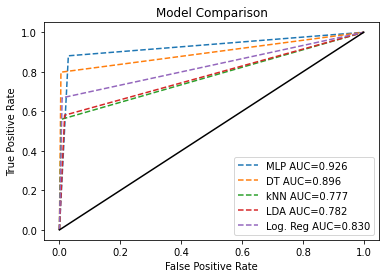

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
mlp_auc_test = roc_auc_score(test_y, mlp_pred_test)
dt_auc_test = roc_auc_score(test_y, dt_pred_test)
knn_auc_test = roc_auc_score(test_y, knn_pred_test)
da_auc_test = roc_auc_score(test_y, da_pred_test)
log_auc_test = roc_auc_score(test_y, log_pred_test)

# calculate fpr and tpr for logistic regression and linear discriminant analysis
mlp_fpr_test, mlp_tpr_test, _ = roc_curve(test_y, mlp_pred_test)
dt_fpr_test, dt_tpr_test, _ = roc_curve(test_y, dt_pred_test)
knn_fpr_test, knn_tpr_test, _ = roc_curve(test_y, knn_pred_test)
da_fpr_test, da_tpr_test, _ = roc_curve(test_y, da_pred_test)
log_fpr_test, log_tpr_test, _ = roc_curve(test_y, log_pred_test)

# Plotting
plt.plot(mlp_fpr_test, mlp_tpr_test, linestyle='--', label="{}{:.3f}".format("MLP AUC=", mlp_auc_test))
plt.plot(dt_fpr_test, dt_tpr_test, linestyle='--', label="{}{:.3f}".format("DT AUC=", dt_auc_test))
plt.plot(knn_fpr_test, knn_tpr_test, linestyle='--', label="{}{:.3f}".format("kNN AUC=", knn_auc_test))
plt.plot(da_fpr_test, da_tpr_test, linestyle='--', label="{}{:.3f}".format("LDA AUC=", da_auc_test))
plt.plot(log_fpr_test, log_tpr_test, linestyle='--', label="{}{:.3f}".format("Log. Reg AUC=", log_auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()